### Agrupamento
Analisar o dataset 'cluster' disponibilizado na pasta data, criar um modelo de agrupamento para os dados e avaliar as métricas

#### Importando bibliotecas

In [46]:
### Análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criação do modelo
from sklearn.cluster import KMeans

### Avaliação de métricas
from sklearn.metrics import calinski_harabasz_score, silhouette_score

#### Leitura de dados

In [2]:
data = pd.read_csv("data/cluster.csv")
data.head() # imprimir 5 primeiros registros

,X1,X2
0,9.475315,12.478082
1,7.769381,4.820967
2,10.665292,12.193943
3,4.859041,18.147385
4,4.805134,17.645864


#### Análise exploratória

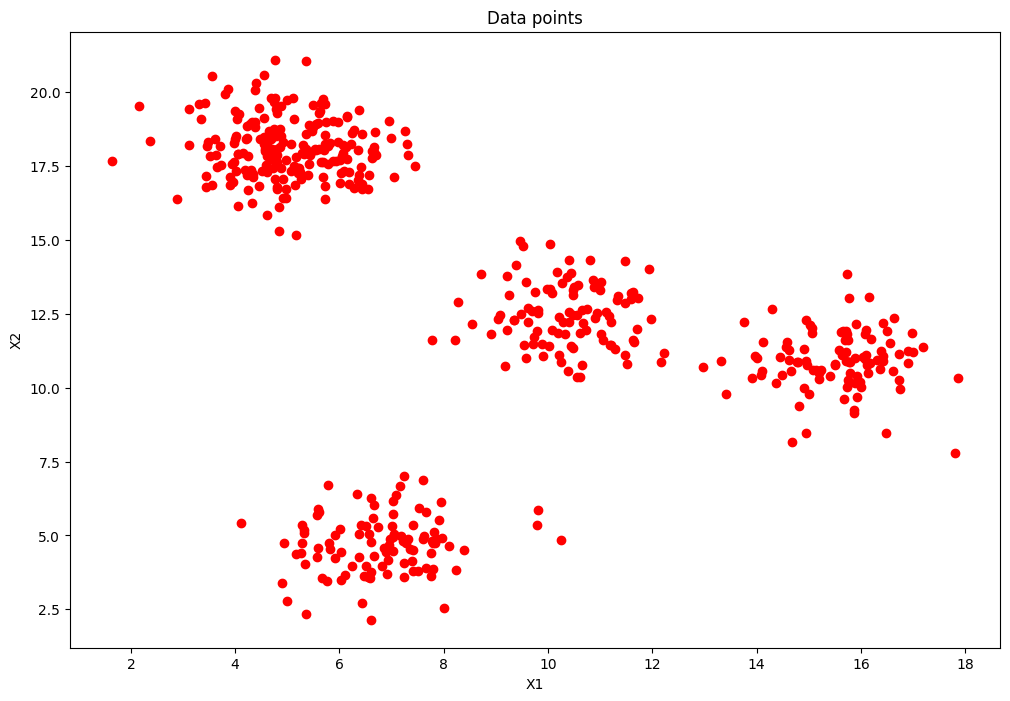

In [3]:
# Plotando pontos
plt.figure(figsize = (12,8))

plt.scatter(x = data['X1'], y = data['X2'], color = "red")
plt.title("Data points")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

#### Definição do modelo e treino

In [4]:
# Todos dados são para treino
# Transformando em array do numpy
X = np.array(data)

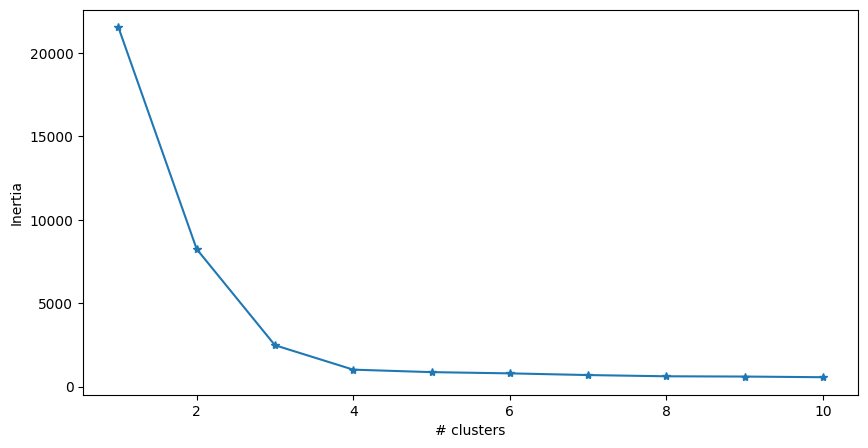

In [5]:
# +Definindo um bom número de clusters
# Método do cotovelo (ELBOW METHOD)

distances = []
for i in range(1,11):
    model = KMeans(n_clusters = i)
    model.fit(X)
    distances.append(model.inertia_)

plt.figure(figsize = (10,5))
plt.plot(range(1,11), distances, marker = '*')
plt.xlabel("# clusters")
plt.ylabel("Inertia")
plt.show()

In [6]:
# instanciando modelos
model = KMeans(n_clusters = 4)

# Treinando modelo
model.fit(X)

KMeans(n_clusters=4)

#### Avaliando modelos

In [7]:
# Calinki-Harabasz e Silhouette Score

print(f'Calinski-Harabasz score: {calinski_harabasz_score(X, model.labels_)}')
print(f'Silhouette score: {silhouette_score(X, model.labels_)}')

Calinski-Harabasz score: 3345.1076937913062
Silhouette score: 0.7338765282998235


In [8]:
# Printando rótulos
print(model.labels_)

[3 2 3 1 1 1 1 1 0 1 3 1 1 3 3 1 3 1 3 3 1 3 2 2 3 3 1 3 0 0 1 1 2 0 2 1 0
 1 1 0 2 1 3 0 1 3 0 2 1 0 0 2 2 2 0 0 1 1 1 2 3 2 2 2 0 1 3 0 3 0 0 1 1 2
 1 1 1 2 2 2 1 3 0 1 1 0 2 2 2 1 0 0 3 0 0 1 1 3 1 1 0 2 1 1 3 1 1 1 1 1 0
 0 2 1 1 0 1 2 1 0 1 1 2 2 2 1 0 2 3 2 1 1 3 1 2 1 2 1 1 3 0 3 2 1 1 1 2 3
 1 2 3 2 0 2 3 3 2 3 2 0 3 0 1 1 1 1 3 1 0 1 3 2 2 1 2 0 0 3 1 3 1 1 2 0 3
 1 3 0 1 1 3 1 2 1 1 0 2 0 2 2 3 3 1 3 1 1 2 0 0 3 1 1 0 1 2 0 3 0 2 3 0 1
 1 1 0 1 2 1 3 3 0 3 1 1 1 3 1 1 2 2 3 1 1 1 2 1 2 3 1 1 1 0 0 1 0 3 1 1 1
 1 3 3 3 3 1 1 1 2 0 2 1 1 2 1 3 0 0 1 2 0 2 1 3 2 3 1 3 2 1 3 0 2 1 2 1 1
 1 1 2 1 1 0 0 0 3 1 1 1 2 1 0 0 0 1 1 1 1 3 1 2 1 3 1 3 2 1 0 1 2 3 0 3 2
 0 0 0 1 3 1 2 0 0 1 0 1 0 0 2 1 1 1 0 1 3 3 1 0 1 3 2 2 1 1 0 1 1 2 3 1 3
 1 0 1 2 1 3 1 3 1 2 2 3 2 0 1 2 1 2 2 0 1 1 1 1 3 1 1 2 1 3 1 0 0 2 2 1 3
 1 2 1 1 2 2 1 0 0 0 1 1 2 0 0 1 1 1 2 3 0 3 0 1 1 2 1 1 3 3 3 3 1 1 2 1 1
 1 1 0 3 2 1 3 3 1 3 1 2 1 1 0 0 0 1 0 2 1 3 0 3 3 1 0 2 3 1 0 0 3 1 2 3 3
 0 3 1 3 1 0 2 3 1 2 0 2 

#### Analisando clusters

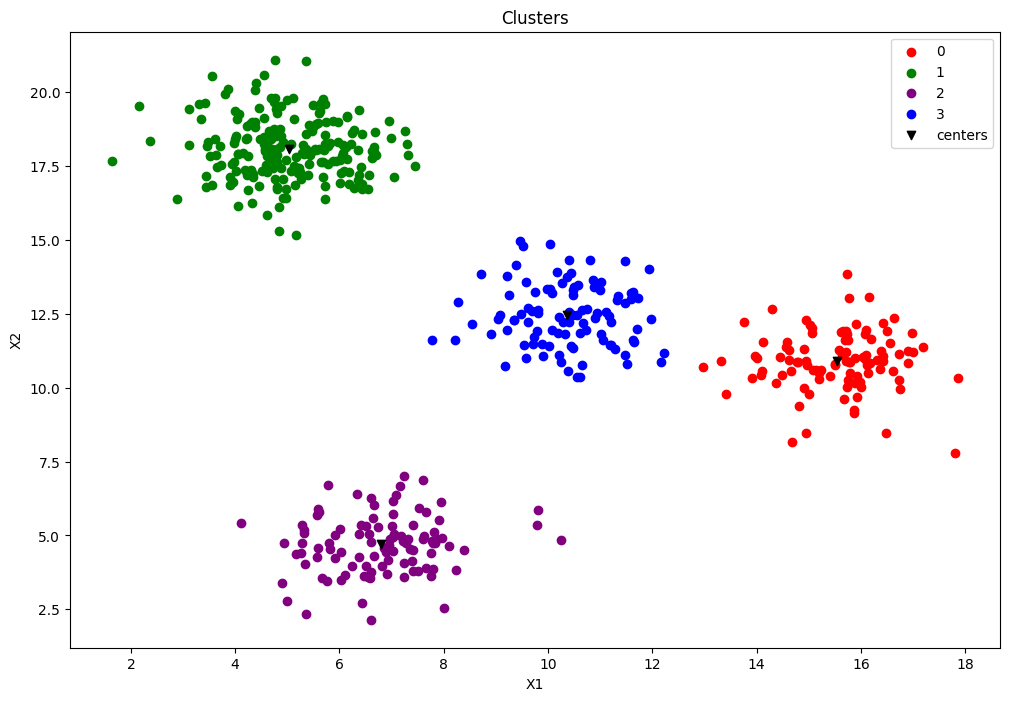

In [9]:
plt.figure(figsize = (12,8))

labels = list(set(model.labels_))
colors = ['red', 'green', 'purple', 'blue']

for i,l in enumerate(labels):
    data_cluster = data.iloc[np.where(model.labels_ == l)[0],:]
    plt.scatter(data_cluster["X1"], data_cluster["X2"], color = colors[i], label = l)
    
plt.scatter(x = model.cluster_centers_[:,0], y = model.cluster_centers_[:,1], marker = 'v', color = 'black', label = "centers")

plt.legend()
plt.title("Clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

#### Exercício de Desafio

Dado o seguinte conjunto de dados 

    Id,Feature1,Feature2
    1,2.5,3.5
    2,1.8,2.0
    3,3.0,3.2
    4,1.5,2.8
    5,2.0,3.0
    6,4.0,4.5
    7,3.5,4.0
    8,4.2,3.8
    9,4.5,4.0
    10,3.7,3.5

- Coloque esses dados dentro de um Dataframe do Pandas e salve em um arquivo CSV (Dica: Use dicionário no python e desconsidere a coluna ID)

- Após a análise exploratória, use o método do Cotovelo para definir a quantidade de Clusters

- Treine o Modelo e o valide usando o método da Silhueta (Não é necessário plotar o gráfico final se não quiser)

#### Leitura de Dados

In [10]:
# Dados
data = {
    'Id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature1': [2.5, 1.8, 3.0, 1.5, 2.0, 4.0, 3.5, 4.2, 4.5, 3.7],
    'Feature2': [3.5, 2.0, 3.2, 2.8, 3.0, 4.5, 4.0, 3.8, 4.0, 3.5]
}

# Criando DataFrame
df = pd.DataFrame(data)

# Salvando em um arquivo CSV
df.to_csv('dados.csv', index=False)

#### Análise Exploratória

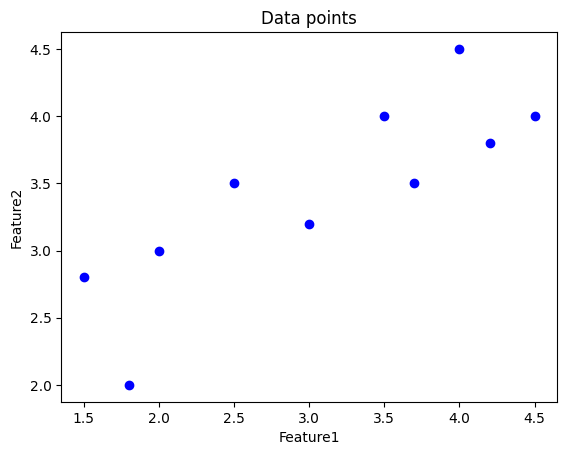

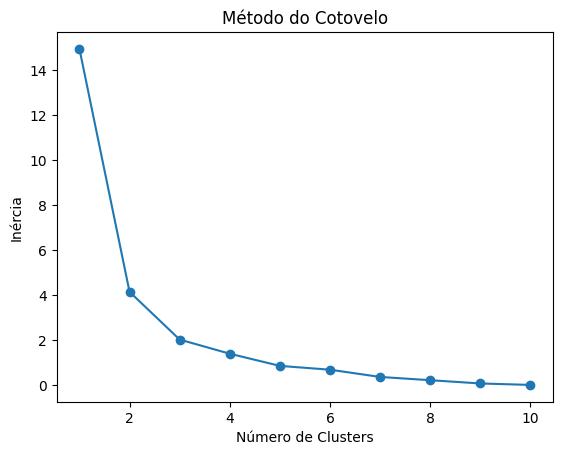

In [11]:
# Carregando os dados
df = pd.read_csv('dados.csv')

# Removendo a coluna 'Id'
X = df.drop(columns=['Id'])

# Lista para armazenar os valores de inércia
inertia = []

# Testando diferentes números de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


# Plotando o gráfico
plt.scatter(x = df['Feature1'], y = df['Feature2'], color = "blue")
plt.title("Data points")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

# Plotando o método do cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

#### Definição do Modelo e treino

In [12]:
# Escolhendo o número ótimo de clusters (n_clusters=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

print(kmeans.labels_)

[2 0 2 0 0 1 1 1 1 1]


#### Validação dos modelos

Coeficiente de Silhueta médio: 0.43237513088963453


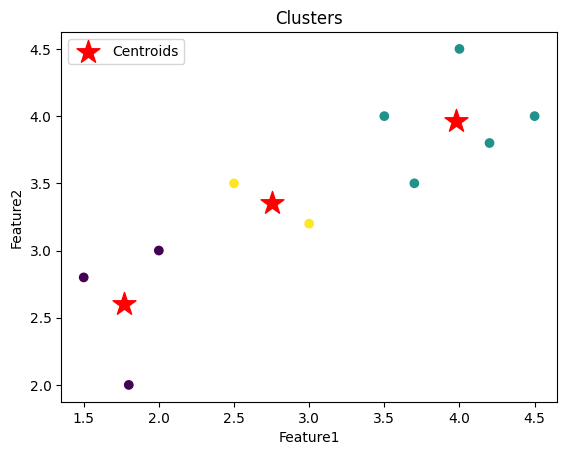

In [13]:
# Adicionando os rótulos ao DataFrame
df['Cluster'] = kmeans.labels_

# Calculando o coeficiente de Silhueta
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Coeficiente de Silhueta médio: {silhouette_avg}')

# Visualizando os clusters
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('Clusters')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()